# LSN Esercizi lezione 2
Gloria Senatore 931644

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Esercizio 2.1

#### Svolgimento

L'integrale $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx$ viene valutato in due modi. Con distribuzione uniforme in ogni esperimento di ciascun blocco viene generato un numero $\bar{x}$ uniformemente distribuito tra $0$ e $1$. Detta $f$ l'integranda, si calcola $f(\bar{x})$ e per ogni blocco si valuta il valor medio delle diverse $f(\bar{x})$. 

Con l'*importance sampling* fattorizzando l'integranda in due funzioni $p$ e $g$, si generano numeri distribuiti come $p$ e si calcola la media dei valori di $g(x)$. Si sceglie $p = \frac{3}{2}(1 - x^2)$, si verifica che $p$ è definita positiva e normalizzata. Si ha $g = \frac{\pi}{2}\cos(\pi x/2)\frac{1}{\frac{3}{2}(1 - x^2)}$. Al fine di ottenere numeri distribuiti con $p$ si utilizza il metodo di *reject*: vengono generati $\bar{x}$ ed $r$ tra 0 e 1. Se $r < \frac{p(\bar{x})}{p_{max}}$, con $p_{max} = \frac{3}{2}$, il numero $\bar{x}$ viene utilizzato nel calcolo di $g(x)$, altrimento viene scartato.

Si sceglie $p$ in modo che sia simile all'integranda. Una conseguenza dell'*importance sampling* è infatti che distribuzioni di probabilità simili a quella da campionare riducono la varianza, dove con varianza si intende $\int {{g}^2 p dx} - I^2$.

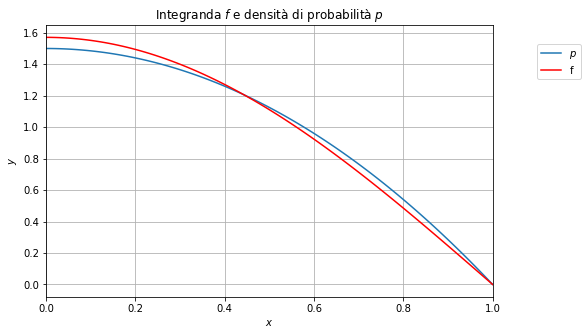

In [9]:
plt.figure(figsize=(8,5))
x=np.linspace(0,1,100)
plt.plot(x, 3/2*(1-x**2), label='$p$')
plt.plot(x, np.pi/2*np.cos(np.pi/2*x), color='red', label='f')
plt.xlabel(r'$x$')
plt.xlim(0, 1)
plt.ylabel(r'$y$')
plt.title("Integranda $f$ e densità di probabilità $p$")
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.grid(True)
plt.show()

#### Risultati

Sono plottati di seguito $I_{stimato}-I_{esatto}$ con le incertezza statistiche in funzione del numero di blocchi.

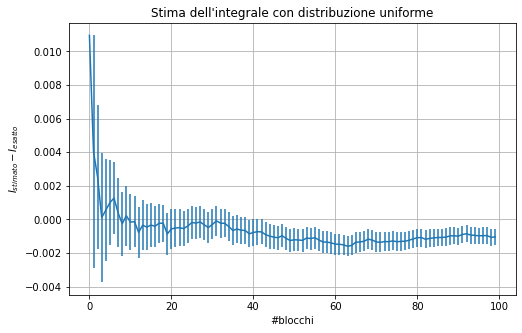

In [2]:
M=1000000              
N=100                 
L=int(M/N)
x = np.arange(N)

plt.figure(figsize=(8,5))
I_unif = np.loadtxt("2.1_I_uniform")
err_I_unif = np.loadtxt("2.1_I_uniform_err")
plt.errorbar(x,I_unif-1,yerr=err_I_unif)
plt.xlabel('#blocchi')
plt.ylabel(r'$I_{stimato}-I_{esatto}$')
plt.title("Stima dell'integrale con distribuzione uniforme")
plt.grid(True)
plt.show()

Con distribuzione uniforme il valore dell'integrale viene leggermente sottostimato.

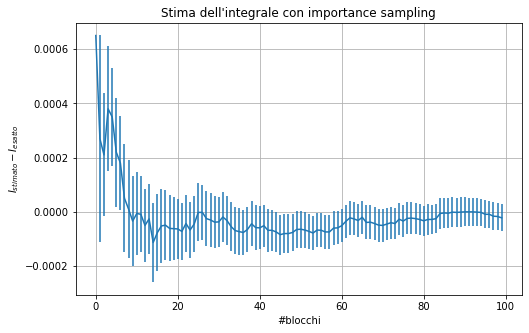

In [3]:
plt.figure(figsize=(8,5))
I_sam = np.loadtxt("2.1_I_sam")
err_I_sam = np.loadtxt("2.1_I_sam_err")
plt.errorbar(x,I_sam-1,yerr=err_I_sam)
plt.xlabel('#blocchi')
plt.ylabel(r'$I_{stimato}-I_{esatto}$')
plt.title("Stima dell'integrale con importance sampling")
plt.grid(True)
plt.show()

Con il metodo dell'*importance sampling* si ha una migliore stima del valore dell'integrale. Come detto prima infatti, si dimostra che più la distribuzione $p$ è vicina all'integranda, più la varianza è ridotta (si noti che la scala delle ordinate è diversa nei due grafici).

### Esercizio 2.2

#### Svolgimento

L'esercizio richiede di stimare la radice quadrata dello spostamento quadratico medio per *random walk* 3D su reticolo discreto e nel continuo partendo dall'origine, per cento passi. Nel caso di reticolo discreto ad ogni passo viene estratto un numero casuale intero $u$ tra 0 e 3, che stabilisce quale delle tre coordinate debba essere incrementata o diminuita di uno, a seconda del valore di un altro numero casuale $p$ (se $p < 0.5$, viene diminuita). 

Nel continuo vengono generati con distribuzione uniforme $\phi$ tra $0$ e $2\pi$ ed $r$ tra $0$ e $1$. $\theta$ si calcola come $\arccos{(1-2r)}$ e la posizione del camminatore viene incrementata rispetto al passo precedente di $\sin{\theta}\cos{\phi}$ per la componente $x$, $\sin{\theta}\sin{\phi}$ per la componente $y$ e $\cos{\theta}$ per la componente $z$.

In entrambi i casi si valuta il modulo quadro della posizione ad ogni passo $i$-esimo, con $i$ da $0$ a $101$ escluso (infatti al tempo iniziale il camminatore si trova nell'origine e poi compie $100$ passi), $|r_{i}|^2 = {x_{i}}^2+{y_{i}}^2+{z_{i}}^2$. Si valuta poi la media su $10^4$ simulazioni come $<|r_{i}|^2> = \sum_{i=0}^{100}\frac{|r_{i}|^2}{10^4}$ e l'incertezza come $\frac{\sigma}{\sqrt{10^4-1}} = \sqrt{\frac{1}{10^4-1}\left[<|r_{i}|^4>-(<|r_{i}|^2>)^2\right]}$.

#### Risultati

Vengono graficati le radici quadrate degli spostamenti quadratici medi al variare del passo $i$ per reticolo discreto e nel continuo e vengono fittati con la funzione $f(i) = \sqrt{i}$.

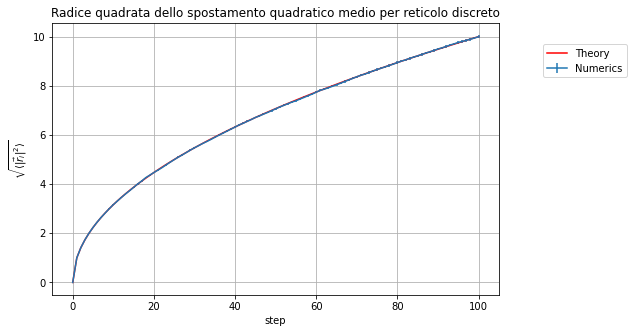

In [4]:
step = np.arange(101)

plt.figure(figsize=(8,5))
sqmd = np.loadtxt("2.2_sqrtmean_discrete")
err_sqmd = np.loadtxt("2.2_err_discrete")
plt.errorbar(step,sqmd,yerr=err_sqmd, label='Numerics')
plt.plot(step, step**0.5, color='red', label='Theory')
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.title("Radice quadrata dello spostamento quadratico medio per reticolo discreto")
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.grid(True)
plt.show()

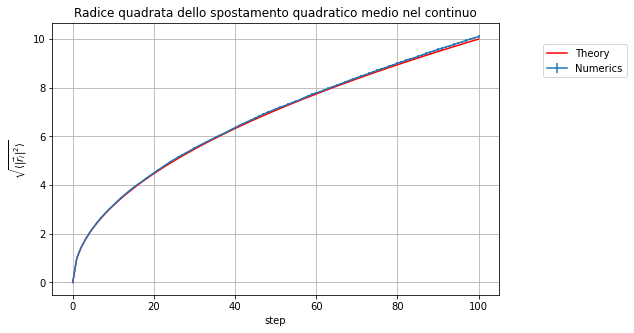

In [5]:
plt.figure(figsize=(8,5))
sqmd = np.loadtxt("2.2_sqrtmean_continue")
err_sqmd = np.loadtxt("2.2_err_continue")
plt.errorbar(step,sqmd,yerr=err_sqmd, label='Numerics')
plt.plot(step, step**0.5, color='red', label='Theory')
plt.xlabel('step')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.title("Radice quadrata dello spostamento quadratico medio nel continuo")
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.grid(True)
plt.show()

Si nota che in entrambi i casi i risultati numerici sono in buon accordo con quelli teorici. Il fatto che i risultati possano essere fittati con una funzione del tipo $f(i) = \sqrt{i}$ indica un comportamento diffusivo. 

Sia $\rho(x, t)$ la densità di probabilità di trovare il camminatore del *random walk* nella posizione $x$ al tempo $t$. Tale densità può essere scritta come onde piana $\rho(x,t) = \tilde\rho_{k}(t)e^{ikx}$. Se $\rho$ soddisfa l'equazione di diffusione $\frac{\partial{\rho(x,t)}}{\partial{t}} = D \nabla^2 \rho(x,t)$, si dimostra che $\rho(x,t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}\tilde\rho_{k}(0)e^{ikx}e^{-Dk^2t}$. Se il camminatore al tempo 0 è nell'origine, si ha che $\rho(x,0) = \delta(x)$ e la sua trasformata di Fourier $\tilde\rho_{k}(0) = 1$. L'integrale diventa una gaussiana: $\rho(x,t) = \frac{1}{\sqrt{4\pi Dt}}\exp{(-\frac{x^2}{4Dt})}$ centrata nell'origine con deviazione standard proporzionale a $\sqrt{t}$, ossia a $\sqrt{i}$ perché il camminatore compie un passo ad ogni tempo discreto.

Si parla dunque di processo diffusivo in quanto la posizione del *random walk* stesso risulta provenire da una distribuzione normale con varianza proporzionale a $t$.